## Analisi e Visualizzazione dei Dati

Script dedicato all’**analisi esplorativa** e alla **visualizzazione** dei dati, finalizzato alla generazione di **insights significativi** per il portfolio.

- Produce grafici descrittivi e comparativi
- Evidenzia trend, pattern e anomalie nei dati
- Supporta la comunicazione dei risultati in modo chiaro e visivo

## Import delle Librerie di Analisi e Visualizzazione

Script di inizializzazione dell’ambiente Python per l’**analisi dei dati**, la **visualizzazione** e la **gestione dei file**.

- Utilizza **pandas** e **numpy** per la manipolazione e l’elaborazione dei dati
- Integra **matplotlib** e **seaborn** per la creazione di grafici esplorativi e analitici
- Include strumenti di supporto per la gestione dei percorsi e dei warning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

## Configurazione Grafici

Impostazioni globali per la **visualizzazione dei dati**, pensate per garantire coerenza stilistica e leggibilità nei grafici del portfolio.

- Applica uno stile grafico pulito e moderno basato su *seaborn*
- Definisce una palette colori armonica per rappresentazioni multi-categoria
- Standardizza dimensioni delle figure e dimensione del font

In [2]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11

## Caricamento dei Dataset

Funzione dedicata al **caricamento centralizzato dei dati** utilizzati nello script di analisi.

- Legge tutti i dataset necessari a partire dalla directory *raw*
- Organizza i dati in una struttura dizionario per un accesso ordinato
- Include dati su **KPI**, **vendite**, **produzione**, **clienti**, **canali** ed **eventi esterni**

In [11]:
def carica_dati():
    """Carica tutti i dataset"""
    
    dati = {
        'kpi': pd.read_csv('C:/Users/Vincenzo/Desktop/Azienda Agricola/Python/File Csv/kpi_annuali.csv'),
        'vendite': pd.read_csv('C:/Users/Vincenzo/Desktop/Azienda Agricola/Python/File Csv/vendite.csv'),
        'prodotti': pd.read_csv('C:/Users/Vincenzo/Desktop/Azienda Agricola/Python/prodotti.csv'),
        'clienti': pd.read_csv('C:/Users/Vincenzo/Desktop/Azienda Agricola/Python/clienti.csv'),
        'canali': pd.read_csv('C:/Users/Vincenzo/Desktop/Azienda Agricola/Python/canali.csv'),
        'prod_vino': pd.read_csv('C:/Users/Vincenzo/Desktop/Azienda Agricola/Python/File Csv/df_prod_vino.csv'),
        'prod_olio': pd.read_csv('C:/Users/Vincenzo/Desktop/Azienda Agricola/Python/File Csv/df_prod_olio.csv'),
        'prod_birra': pd.read_csv('C:/Users/Vincenzo/Desktop/Azienda Agricola/Python/File Csv/produzione_birra.csv'),
        'eventi': pd.read_csv('C:/Users/Vincenzo/Desktop/Azienda Agricola/Python/File Csv/eventi_esterni.csv'),
    }
    
    # Converti date
    dati['vendite']['data_vendita'] = pd.to_datetime(dati['vendite']['data_vendita'])
    dati['vendite']['anno'] = dati['vendite']['data_vendita'].dt.year
    
    return dati
dati = carica_dati()

In [15]:
dati['kpi'].head()

,anno,fatturato_totale,fatturato_vino,fatturato_olio,fatturato_birra,fatturato_resort,margine_operativo_percentuale,bottiglie_vendute,litri_olio_venduti,litri_birra_venduti,ospiti_resort,export_percentuale,note
0,2015,5998705.99,1767564.51,1058007.24,884419.73,2288714.51,34.59,152832,60144,219204,20053,38.27,NaN
1,2016,6263292.92,2149967.28,992790.06,809116.12,2311419.46,35.05,152166,59028,215364,20264,40.49,NaN
2,2017,6835703.29,2634326.17,1020796.59,888237.09,2292343.44,35.38,153204,60654,217200,19921,45.91,NaN
3,2018,6947994.33,2776651.19,1002959.10,889028.89,2279355.15,35.48,152118,58932,217296,20059,47.74,NaN
4,2019,6941655.21,2748472.19,1001106.59,873520.95,2318555.48,35.56,150186,59256,214656,20151,47.67,NaN


# KPI Aziendali – Andamento del Fatturato

Questa sezione presenta un’analisi dei **KPI economici aziendali**, focalizzata
sull’evoluzione del **fatturato totale** e sul **tasso di crescita anno su anno
(Year-over-Year)** nel periodo 2015–2025.

---

## Obiettivi dell’analisi
- Monitorare l’andamento del **fatturato complessivo**
- Valutare la **dinamica di crescita YoY**
- Individuare fasi di **espansione** e **contrazione**
- Contestualizzare i risultati rispetto a eventi esterni rilevanti

---

## Indicatori analizzati
- **Fatturato totale** (milioni di euro)
- **Crescita YoY (%)**

---

## Descrizione dei grafici

### Evoluzione del fatturato
- Il grafico mostra l’andamento temporale del **fatturato aziendale**
- I valori sono espressi in **milioni di euro**
- Le aree ombreggiate evidenziano periodi di:
  - **COVID-19** (2019–2021)
  - **Siccità / annate critiche** (2022–2024)

### Crescita Year-over-Year
- Le barre rappresentano la **variazione percentuale annuale**
- Barre **verdi** indicano crescita positiva
- Barre **rosse** indicano contrazione del fatturato
- La linea orizzontale a zero separa crescita e decrescita

---

## Interpretazione
L’analisi combinata dei due grafici consente di:
- valutare la **stabilità del fatturato nel tempo**
- individuare anni di **shock economico**
- misurare la capacità di **recupero e resilienza**
- supportare decisioni di **pianificazione strategica**

---

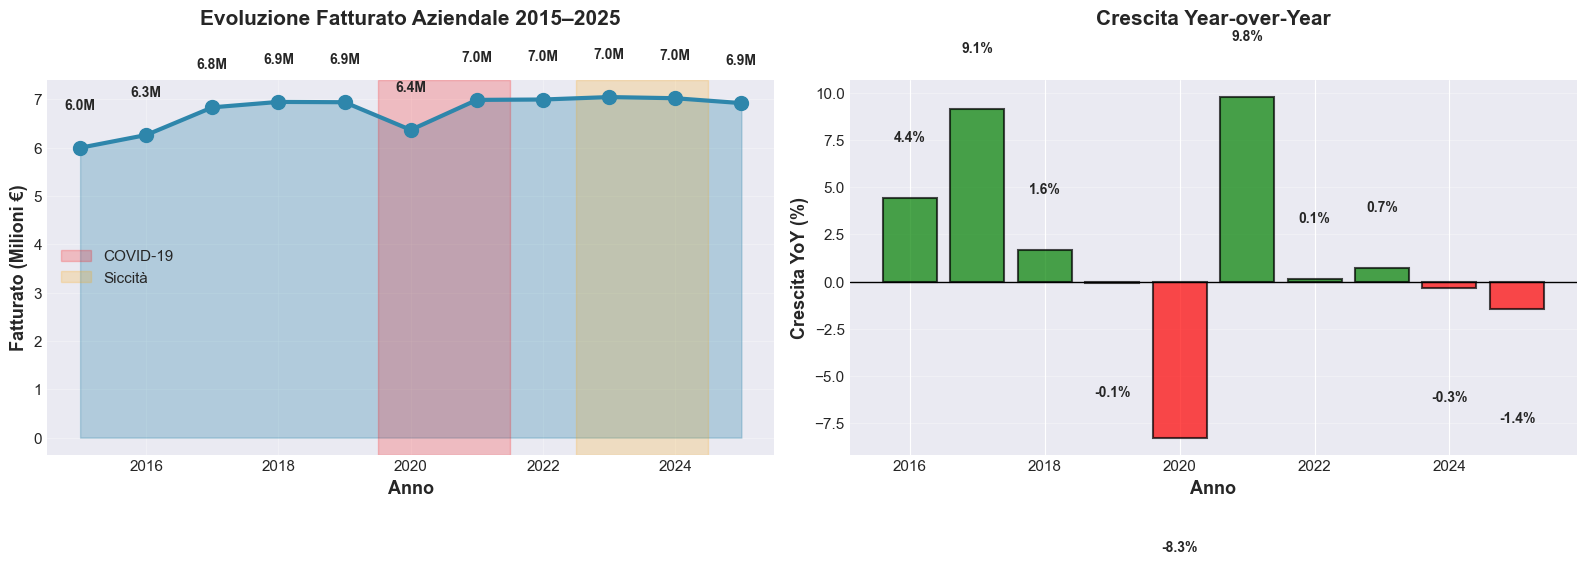

In [5]:
# Estrazione KPI
kpi = dati['kpi']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Grafico 1: Evoluzione fatturato
ax1.plot(
    kpi['anno'],
    kpi['fatturato_totale'] / 1_000_000,
    marker='o',
    linewidth=3,
    markersize=10,
    color='#2E86AB'
)

ax1.fill_between(
    kpi['anno'],
    kpi['fatturato_totale'] / 1_000_000,
    alpha=0.3,
    color='#2E86AB'
)

ax1.axvspan(2019.5, 2021.5, alpha=0.2, color='red', label='COVID-19')
ax1.axvspan(2022.5, 2024.5, alpha=0.2, color='orange', label='Siccità')

ax1.set_xlabel('Anno', fontsize=13, fontweight='bold')
ax1.set_ylabel('Fatturato (Milioni €)', fontsize=13, fontweight='bold')
ax1.set_title('Evoluzione Fatturato Aziendale 2015–2025', fontsize=15, fontweight='bold', pad=40)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)

for x, y in zip(kpi['anno'], kpi['fatturato_totale'] / 1_000_000):
    ax1.text(x, y + 0.8, f'{y:.1f}M', ha='center', fontsize=10, fontweight='bold')
    # Grafico 2: Crescita YoY
kpi['crescita_yoy'] = kpi['fatturato_totale'].pct_change() * 100
colors = ['red' if x < 0 else 'green' for x in kpi['crescita_yoy'].dropna()]

ax2.bar(
    kpi['anno'][1:],
    kpi['crescita_yoy'].dropna(),
    color=colors,
    alpha=0.7,
    edgecolor='black',
    linewidth=1.5
)

ax2.axhline(0, color='black', linewidth=1)
ax2.set_xlabel('Anno', fontsize=13, fontweight='bold')
ax2.set_ylabel('Crescita YoY (%)', fontsize=13, fontweight='bold')
ax2.set_title('Crescita Year-over-Year', fontsize=15, fontweight='bold', pad=40)
ax2.grid(True, alpha=0.3, axis='y')

for x, y in zip(kpi['anno'][1:], kpi['crescita_yoy'].dropna()):
    ax2.text(
        x,
        y + (3 if y > 0 else -6),
        f'{y:.1f}%',
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

# Distribuzione del Fatturato per Categoria

Questa sezione analizza la **composizione del fatturato aziendale** per
**categoria di prodotto**, evidenziando il contributo percentuale di ciascun
segmento e la sua evoluzione nel tempo.

---

## Obiettivi dell’analisi
- Misurare il **peso relativo** delle diverse categorie sul fatturato totale
- Analizzare la **struttura del business**
- Valutare l’evoluzione temporale dei ricavi per categoria
- Individuare trend di **crescita o contrazione settoriale**

---

## Metodologia
L’analisi si basa su:
- integrazione tra **dati di vendita** e **anagrafica prodotti**
- aggregazione del **ricavo netto** per categoria e per anno
- calcolo della **percentuale di contributo** sul fatturato complessivo
- visualizzazione tramite grafici comparativi

---

## Output dell’analisi
I risultati includono:
- distribuzione percentuale del **fatturato per categoria**
- grafico **area stacked** della composizione del fatturato nel tempo
- grafico di **trend** del fatturato per singola categoria

---

## Lettura dei grafici

### Distribuzione del fatturato
- L’area stacked mostra come il fatturato totale si compone nel tempo
- Ogni area rappresenta una **categoria di prodotto**
- L’altezza complessiva indica il **fatturato totale annuale**

### Trend per categoria
- Le linee mostrano l’andamento del fatturato per ciascuna categoria
- Il confronto evidenzia categorie **trainanti** e segmenti più **volatili**
- Consente di individuare cambiamenti strutturali nel mix di ricavi

---

## Implicazioni strategiche
Questa analisi supporta:
- decisioni di **diversificazione del portafoglio**
- valutazioni su **investimenti settoriali**
- analisi di **rischio e concentrazione del fatturato**
- pianificazione commerciale e produttiva

---


 RISULTATI:
  Distribuzione Fatturato per Categoria:
    Birra               : €      9,621,390 ( 12.9%)
    Olio                : €     11,170,785 ( 15.0%)
    Servizio Resort     : €     24,600,806 ( 33.1%)
    Vino                : €     28,945,866 ( 38.9%)

 GRAFICO:


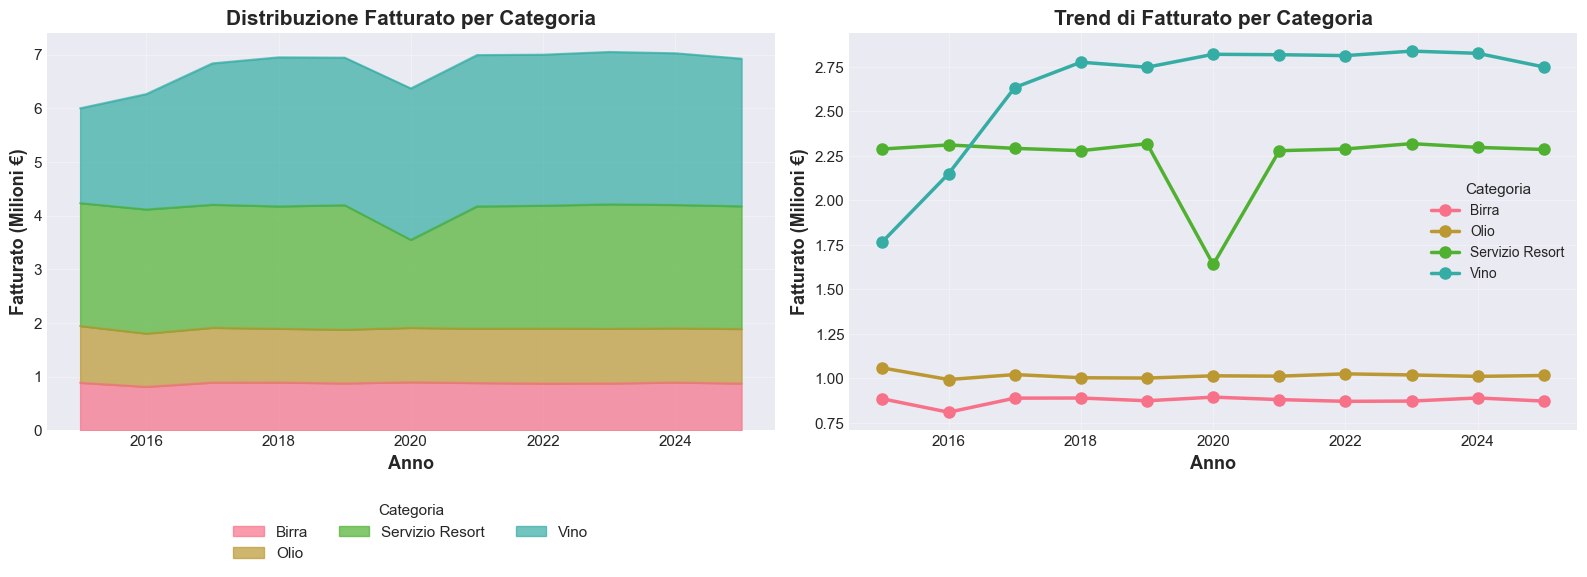

In [6]:
# Integrazione dati vendite e prodotti
vendite = dati['vendite']
prodotti = dati['prodotti']
vendite_full = vendite.merge(
    prodotti[['id_prodotto', 'categoria']],
    on='id_prodotto'
)

# Calcolo fatturato per categoria
cat_ricavi = vendite_full.groupby('categoria')['ricavo_netto'].sum()
cat_ricavi_perc = (cat_ricavi / cat_ricavi.sum() * 100).round(1)

print("\n RISULTATI:")
print("  Distribuzione Fatturato per Categoria:")
for cat, ricavo in cat_ricavi.items():
    perc = cat_ricavi_perc[cat]
    print(f"    {cat:20s}: €{ricavo:>15,.0f} ({perc:>5.1f}%)")

print("\n GRAFICO:")

fatturato_cat = (
    vendite_full
    .groupby(['anno', 'categoria'])['ricavo_netto']
    .sum()
    .reset_index()
)

fatturato_cat['ricavo_milioni'] = fatturato_cat['ricavo_netto'] / 1_000_000

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Grafico 1: Area stacked
pivot = fatturato_cat.pivot(
    index='anno',
    columns='categoria',
    values='ricavo_milioni'
)

pivot.plot(kind='area', stacked=True, ax=ax1, alpha=0.7)

ax1.set_xlabel('Anno', fontsize=13, fontweight='bold')
ax1.set_ylabel('Fatturato (Milioni €)', fontsize=13, fontweight='bold')
ax1.set_title('Distribuzione Fatturato per Categoria', fontsize=15, fontweight='bold')
ax1.legend(
    title='Categoria',
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
    fontsize=11,
    frameon=False
)

ax1.grid(True, alpha=0.3)

# Grafico 2: Trend per categoria
for categoria in pivot.columns:
    ax2.plot(
        pivot.index,
        pivot[categoria],
        marker='o',
        linewidth=2.5,
        label=categoria,
        markersize=8
    )

ax2.set_xlabel('Anno', fontsize=13, fontweight='bold')
ax2.set_ylabel('Fatturato (Milioni €)', fontsize=13, fontweight='bold')
ax2.set_title('Trend di Fatturato per Categoria', fontsize=15, fontweight='bold')
ax2.legend(title='Categoria', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analisi della Produzione di Vino (2015–2025)

Questa analisi esamina l’andamento **annuale della produzione di vino** e della  
**resa media per ettaro**, con l’obiettivo di valutare la performance produttiva
nel medio-lungo periodo.

---

## Obiettivi dell’analisi
- Identificare l’anno di **massima** e **minima** produzione
- Calcolare la **differenza produttiva** tra gli estremi
- Analizzare l’evoluzione della **resa per ettaro**
- Evidenziare eventuali **periodi critici** (es. siccità)

---

## Indicatori considerati
- **Produzione totale di vino** (litri)
- **Resa media per ettaro** (quintali/ha)

---

## Output dell’analisi
L’analisi produce:
- un riepilogo numerico degli anni migliori e peggiori
- un grafico della **produzione totale annuale**
- un grafico della **resa media per ettaro**
- una linea di riferimento sulla **media storica**

---

## Nota interpretativa
Nei grafici, la fascia evidenziata rappresenta un **periodo di stress climatico
(siccità)**, utile per confrontare la produzione e la resa con gli anni standard.

---

## Utilizzo dei risultati
I risultati possono essere utilizzati per:
- supportare **decisioni strategiche aziendali**
- valutazioni di **sostenibilità agricola**
- pianificazione produttiva pluriennale
- reportistica gestionale

---


 RISULTATI:
  • Anno migliore:  2022 →    1,563,927 litri
  • Anno peggiore:  2024 →      594,264 litri
  • Differenza:          969,663 litri (62.0%)

 GRAFICO:


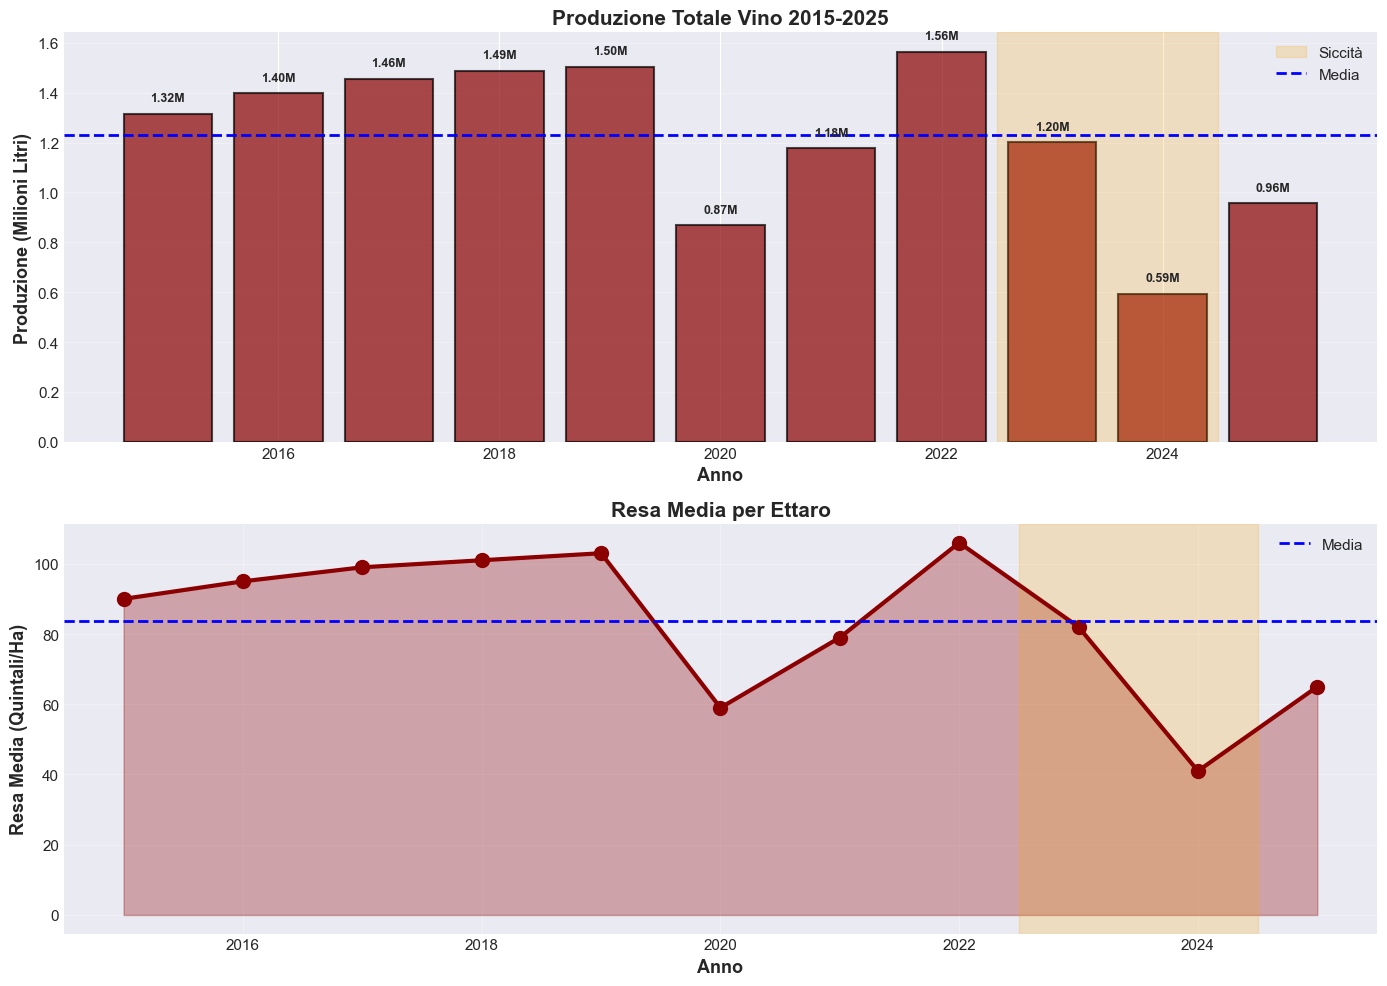

In [11]:
prod_vino = dati['prod_vino']
prod_annuale = prod_vino.groupby('anno').agg({
    'litri_vino_prodotti': 'sum',
    'resa_per_ettaro': 'mean'
}).round(0)

anno_peggiore = prod_annuale['litri_vino_prodotti'].idxmin()
litri_peggiore = prod_annuale.loc[anno_peggiore, 'litri_vino_prodotti']
anno_migliore = prod_annuale['litri_vino_prodotti'].idxmax()
litri_migliore = prod_annuale.loc[anno_migliore, 'litri_vino_prodotti']

print("\n RISULTATI:")
print(f"  • Anno migliore:  {anno_migliore} → {litri_migliore:>12,.0f} litri")
print(f"  • Anno peggiore:  {anno_peggiore} → {litri_peggiore:>12,.0f} litri")
print(f"  • Differenza:     {litri_migliore - litri_peggiore:>12,.0f} litri ({(litri_migliore-litri_peggiore)/litri_migliore*100:.1f}%)")

# Grafico
print("\n GRAFICO:")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Grafico 1: Produzione totale
bars = ax1.bar(prod_annuale.index, prod_annuale['litri_vino_prodotti'] / 1_000_000,
       color='#8B0000', alpha=0.7, edgecolor='black', linewidth=1.5)

# Evidenzia anni critici
ax1.axvspan(2022.5, 2024.5, alpha=0.2, color='orange', label='Siccità')
ax1.axhline(prod_annuale['litri_vino_prodotti'].mean() / 1_000_000, 
           color='blue', linestyle='--', linewidth=2, label='Media')

ax1.set_xlabel('Anno', fontsize=13, fontweight='bold')
ax1.set_ylabel('Produzione (Milioni Litri)', fontsize=13, fontweight='bold')
ax1.set_title('Produzione Totale Vino 2015-2025', fontsize=15, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')
ax1.legend(fontsize=11)

for bar, (x, y) in zip(bars, zip(prod_annuale.index, prod_annuale['litri_vino_prodotti'] / 1_000_000)):
    height = bar.get_height()
    ax1.text(x, height + 0.05, f'{y:.2f}M', ha='center', fontsize=9, fontweight='bold')

# Grafico 2: Resa per ettaro
ax2.plot(prod_annuale.index, prod_annuale['resa_per_ettaro'],
        marker='o', linewidth=3, markersize=10, color='#8B0000')
ax2.fill_between(prod_annuale.index, prod_annuale['resa_per_ettaro'],
                 alpha=0.3, color='#8B0000')

ax2.axvspan(2022.5, 2024.5, alpha=0.2, color='orange')
ax2.axhline(prod_annuale['resa_per_ettaro'].mean(), 
           color='blue', linestyle='--', linewidth=2, label='Media')

ax2.set_xlabel('Anno', fontsize=13, fontweight='bold')
ax2.set_ylabel('Resa Media (Quintali/Ha)', fontsize=13, fontweight='bold')
ax2.set_title('Resa Media per Ettaro', fontsize=15, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

# Top 10 Prodotti per Fatturato (2015–2025)

Questa sezione analizza i **prodotti con il maggior ricavo netto complessivo**
nel periodo 2015–2025, integrando i dati di vendita con le informazioni di
catalogo prodotto.

---

## Obiettivi dell’analisi
- Identificare i **10 prodotti più redditizi**
- Analizzare il contributo al fatturato per **categoria di prodotto**
- Evidenziare le performance economiche di lungo periodo
- Supportare decisioni di **portfolio e pricing**

---

## Metodologia
L’analisi si basa su:
- integrazione tra **vendite** e **anagrafica prodotti**
- aggregazione del **ricavo netto totale** per prodotto
- ordinamento decrescente per individuare i top performer

---

## Output dell’analisi
L’output comprende:
- una classifica dei **Top 10 prodotti per fatturato**
- un grafico a barre orizzontali del **ricavo totale**
- una distinzione cromatica per **categoria merceologica**

---

## Lettura del grafico
- Ogni barra rappresenta il **ricavo totale** di un prodotto
- I colori identificano la **categoria** (Vino, Olio, Birra, Servizi)
- I valori sono espressi in **milioni di euro**
- L’ordinamento facilita il confronto immediato delle performance

---

## Utilizzo dei risultati
Questa analisi è utile per:
- valutazioni di **redditività prodotto**
- strategie di **allocazione delle risorse**
- decisioni su **sviluppo, promozione o razionalizzazione** del catalogo
- reportistica direzionale e commerciale

---


 RISULTATI:
  Top 10 Prodotti:
     1. Pernottamento Wine Resort                (Servizio Resort): €  19,190,838
     2. Esperienza Degustazione                  (Servizio Resort): €   5,409,968
     3. Nero d'Avola Magnum                      (Vino           ): €   5,330,700
     4. Syrah Riserva DOCG                       (Vino           ): €   4,311,616
     5. Nero d'Avola DOC                         (Vino           ): €   3,754,402
     6. Spumante Metodo Classico                 (Vino           ): €   3,658,475
     7. Chardonnay Barrique                      (Vino           ): €   3,402,706
     8. Olio EVO Nocellara Monovarietale         (Olio           ): €   3,206,176
     9. Grillo DOC                               (Vino           ): €   3,170,650
    10. Birra Artigianale Rossa                  (Birra          ): €   3,008,613

 GRAFICO:


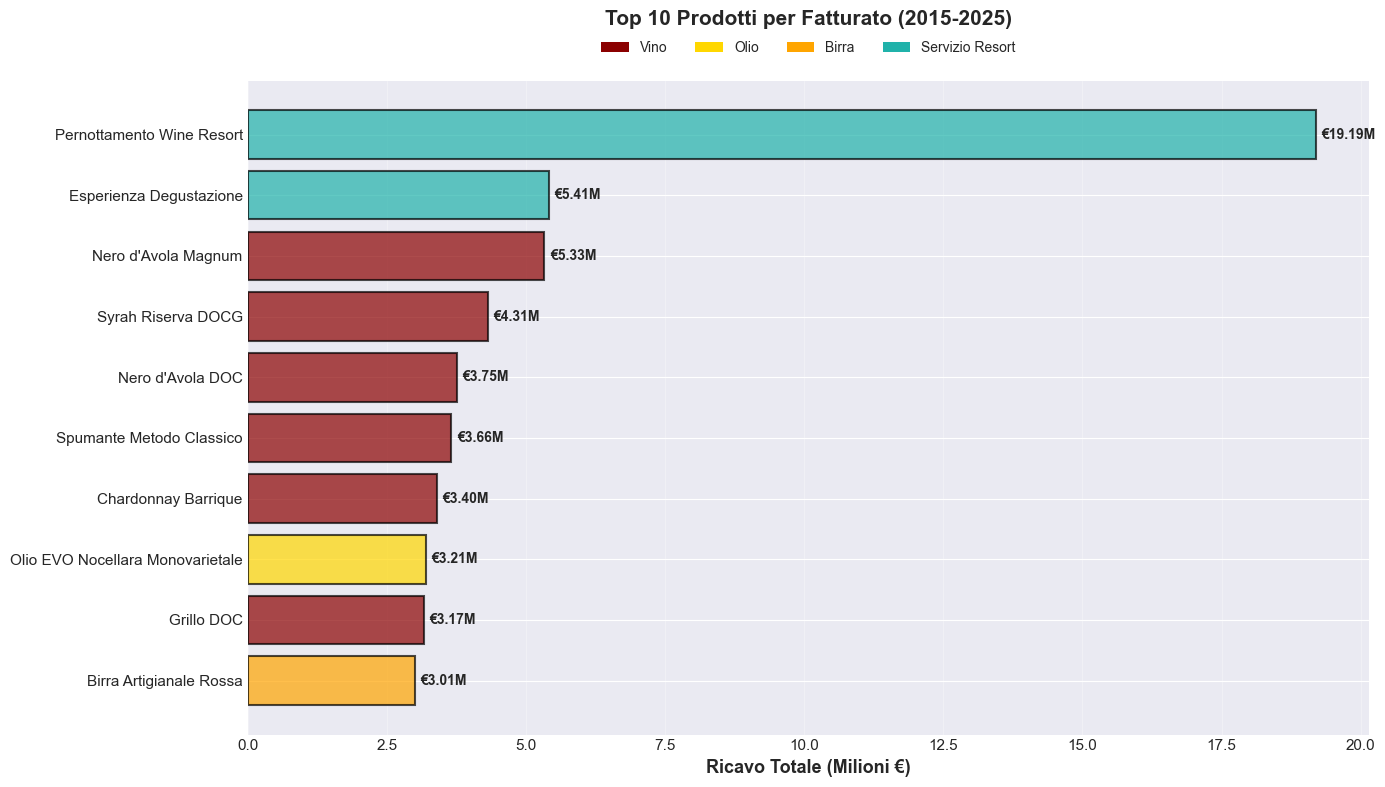

In [24]:
vendite_prod = vendite.merge(
    prodotti[['id_prodotto', 'nome_prodotto', 'categoria']], 
    on='id_prodotto'
)

top_10 = vendite_prod.groupby(['nome_prodotto', 'categoria'])\
    .agg({'ricavo_netto': 'sum'})\
    .sort_values('ricavo_netto', ascending=False)\
    .head(10)

print("\n RISULTATI:")
print("  Top 10 Prodotti:")
for i, ((prodotto, categoria), row) in enumerate(top_10.iterrows(), 1):
    ricavo = row['ricavo_netto']
    print(f"    {i:2d}. {prodotto:40s} ({categoria:15s}): €{ricavo:>12,.0f}")

# Grafico
print("\n GRAFICO:")
fig, ax = plt.subplots(figsize=(14, 8))

colors_map = {
    'Vino': '#8B0000', 
    'Olio': '#FFD700', 
    'Birra': '#FFA500', 
    'Servizio Resort': '#20B2AA'
}

top_10_reset = top_10.reset_index()
bar_colors = [colors_map[cat] for cat in top_10_reset['categoria']]

bars = ax.barh(range(len(top_10_reset)), 
               top_10_reset['ricavo_netto'] / 1_000_000,
               color=bar_colors, alpha=0.7, edgecolor='black', linewidth=1.5)

ax.set_yticks(range(len(top_10_reset)))
ax.set_yticklabels(top_10_reset['nome_prodotto'])
ax.set_xlabel('Ricavo Totale (Milioni €)', fontsize=13, fontweight='bold')
ax.set_title(
    'Top 10 Prodotti per Fatturato (2015-2025)',
    fontsize=15,
    fontweight='bold',
    pad=40
)
ax.grid(True, alpha=0.3, axis='x')
ax.invert_yaxis()

# Aggiungi valori
for i, (bar, val) in enumerate(zip(bars, top_10_reset['ricavo_netto'] / 1_000_000)):
    ax.text(val + 0.1, i, f'€{val:.2f}M', 
           va='center', fontsize=10, fontweight='bold')

# Legenda
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=cat) 
                  for cat, color in colors_map.items()]
ax.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.08),
    ncol=len(colors_map),
    fontsize=10,
    frameon=False
)
plt.tight_layout()
plt.show()

# Impatto di Eventi Esterni su Produzione e Fatturato

Questa sezione analizza l’impatto di **eventi esterni straordinari** sulle
performance economiche e produttive dell’azienda, con particolare riferimento
alla **pandemia COVID-19** e a un periodo di **stress climatico (siccità)**.

---

## Obiettivi dell’analisi
- Valutare l’impatto del **COVID-19** sul fatturato del vino
- Misurare gli effetti della **siccità** sulla produzione vitivinicola
- Confrontare l’andamento dei diversi **settori di business**
- Contestualizzare i risultati nel periodo 2015–2025

---

## Metodologia
L’analisi si basa su:
- confronto **anno su anno** dei KPI economici
- calcolo delle **variazioni percentuali** in presenza di eventi critici
- analisi congiunta di **fatturato** e **volumi produttivi**
- visualizzazione temporale degli andamenti

---

## Output dell’analisi
I risultati includono:
- variazione percentuale del **fatturato vino** nel periodo COVID
- variazione percentuale della **produzione di vino** durante la siccità
- grafico dell’andamento del fatturato per **settore di attività**
- evidenziazione visiva degli **eventi esterni**

---

## Lettura del grafico
- Le linee rappresentano il **fatturato annuale** per settore
- I valori sono espressi in **milioni di euro**
- Le aree ombreggiate indicano:
  - **COVID-19** (impatto sulla domanda e sul canale Ho.Re.Ca.)
  - **Siccità / annate critiche** (impatto sulla produzione agricola)
- Il confronto evidenzia differenti livelli di **resilienza settoriale**

---

## Considerazioni strategiche
L’analisi consente di:
- valutare la **robustezza del modello di business**
- identificare settori più **esposti al rischio**
- supportare strategie di **diversificazione**
- migliorare la pianificazione in scenari di crisi

---


 RISULTATI:

  COVID-19 (2020):
    • Fatturato vino 2019:  €      2,748,472
    • Fatturato vino 2020:  €      2,821,069
    • Variazione:                       2.6%

  SICCITÀ (2024):
    • Produzione 2022:            1,563,927 litri
    • Produzione 2024:              594,264 litri
    • Variazione:                     -62.0%

 GRAFICO:


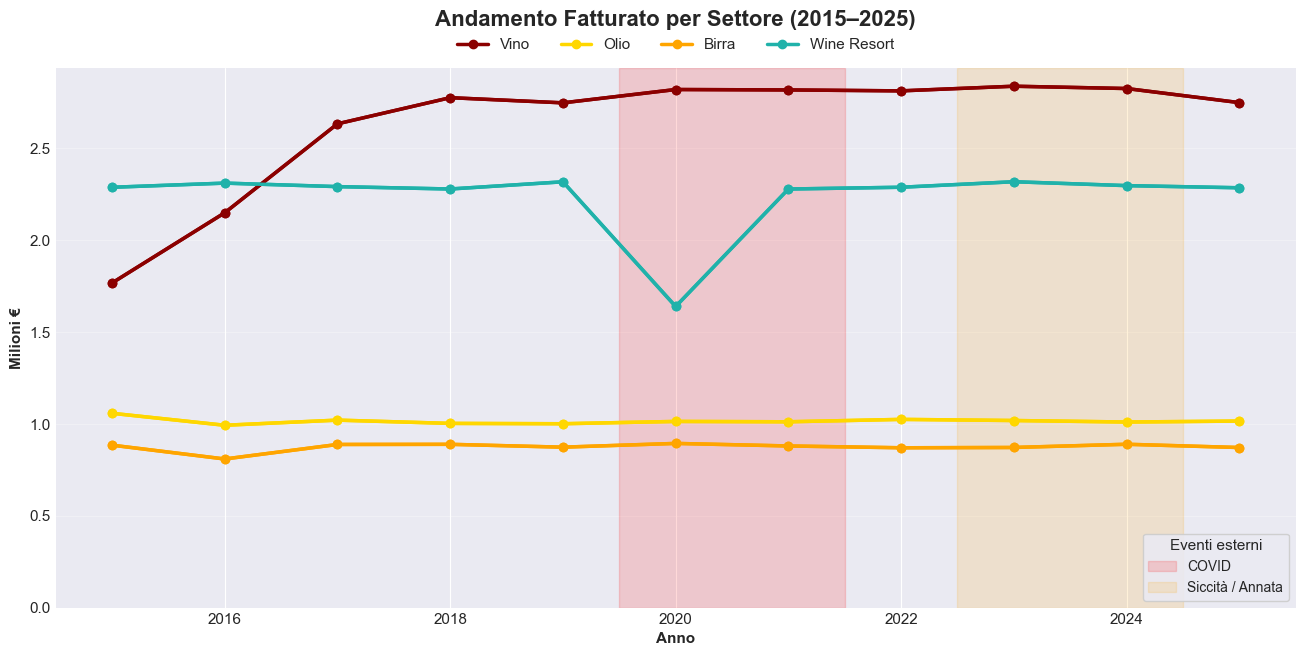

In [32]:
fatt_vino_2019 = kpi[kpi['anno'] == 2019]['fatturato_vino'].values[0]
fatt_vino_2020 = kpi[kpi['anno'] == 2020]['fatturato_vino'].values[0]
calo_covid = (fatt_vino_2020 - fatt_vino_2019) / fatt_vino_2019 * 100

litri_2022 = prod_vino[prod_vino['anno'] == 2022]['litri_vino_prodotti'].sum()
litri_2024 = prod_vino[prod_vino['anno'] == 2024]['litri_vino_prodotti'].sum()
calo_siccita = (litri_2024 - litri_2022) / litri_2022 * 100

print("\n RISULTATI:")
print(f"\n  COVID-19 (2020):")
print(f"    • Fatturato vino 2019:  €{fatt_vino_2019:>15,.0f}")
print(f"    • Fatturato vino 2020:  €{fatt_vino_2020:>15,.0f}")
print(f"    • Variazione:           {calo_covid:>15.1f}%")

print(f"\n  SICCITÀ (2024):")
print(f"    • Produzione 2022:      {litri_2022:>15,.0f} litri")
print(f"    • Produzione 2024:      {litri_2024:>15,.0f} litri")
print(f"    • Variazione:           {calo_siccita:>15.1f}%")

# Grafico
print("\n GRAFICO:")

fig, ax = plt.subplots(figsize=(16, 9))

# VINO
ax.plot(
    kpi['anno'],
    kpi['fatturato_vino'] / 1_000_000,
    color='#8B0000',
    marker='o',
    linewidth=2.5,
    label='Vino'
)

# OLIO
ax.plot(
    kpi['anno'],
    kpi['fatturato_olio'] / 1_000_000,
    color='#FFD700',
    marker='o',
    linewidth=2.5,
    label='Olio'
)

# BIRRA
ax.plot(
    kpi['anno'],
    kpi['fatturato_birra'] / 1_000_000,
    color='#FFA500',
    marker='o',
    linewidth=2.5,
    label='Birra'
)

# RESORT
ax.plot(
    kpi['anno'],
    kpi['fatturato_resort'] / 1_000_000,
    color='#20B2AA',
    marker='o',
    linewidth=2.5,
    label='Wine Resort'
)


line_vino, = ax.plot(kpi['anno'], kpi['fatturato_vino'] / 1_000_000,
                     color='#8B0000', marker='o', linewidth=2.5, label='Vino')

line_olio, = ax.plot(kpi['anno'], kpi['fatturato_olio'] / 1_000_000,
                     color='#FFD700', marker='o', linewidth=2.5, label='Olio')

line_birra, = ax.plot(kpi['anno'], kpi['fatturato_birra'] / 1_000_000,
                      color='#FFA500', marker='o', linewidth=2.5, label='Birra')

line_resort, = ax.plot(kpi['anno'], kpi['fatturato_resort'] / 1_000_000,
                       color='#20B2AA', marker='o', linewidth=2.5, label='Wine Resort')

# EVENTI ESTERNI
covid = ax.axvspan(2019.5, 2021.5, alpha=0.15, color='red', label='COVID')
siccita = ax.axvspan(2022.5, 2024.5, alpha=0.15, color='orange', label='Siccità / Annata')

# STILE
ax.set_title('Andamento Fatturato per Settore (2015–2025)', fontsize=16, fontweight='bold', pad=30)
ax.set_xlabel('Anno', fontweight='bold')
ax.set_ylabel('Milioni €', fontweight='bold')
ax.set_ylim(bottom=0)

ax.grid(True, alpha=0.3, axis='y')

# LEGENDA 
legend_top = ax.legend(
    handles=[line_vino, line_olio, line_birra, line_resort],
    loc='upper center',
    bbox_to_anchor=(0.5, 1.08),
    ncol=4,
    fontsize=11,
    frameon=False
)
ax.add_artist(legend_top) 
ax.legend(
    handles=[covid, siccita],
    title='Eventi esterni',
    loc='lower right',
    fontsize=10,
    frameon=True,
    framealpha=0.9
)
plt.subplots_adjust(top=0.82, bottom=0.22)
plt.show()